# Photo Compression System With K-Means - V2 🖼️
##### My Github:ARSALANnam(Echolyno)
##### My Email: arsalannam9710@gmail.com
##### My Linkedin:www.linkedin.com/in/arsalannam


## This Python code demonstrates how to compress an image by reducing the number of unique colors using the K-Means clustering algorithm. This method is particularly useful for decreasing image file size while retaining reasonable visual quality.

## The difference between this version and the previous version is that this code itself obtains the intelligent K and uses it in the model.

# Import Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import structural_similarity
import os
import time

import cv2 : Imports the OpenCV library, which is used for image processing operations such as reading, writing, and converting images.  

from sklearn.cluster import KMeans : Imports the KMeans class from the cluster module of the scikit-learn library. This class provides the implementation of the K-Means clustering algorithm.

In [46]:
def find_optimal_k_and_compress(image, pixels, target_ssim=0.92, max_k=64):
    #Inputs: image, pixels, target quality (default 92%), and maximum k allowed.
    klist = [4, 8, 12, 16, 24, 32, 48, 64, 128]
    
    best_k = klist[0]
    best_img = None
    prev_ssim = -1
    
    print(f"Starting Smart Optimization (Target SSIM: {target_ssim})")
    
    for k in klist:
        if k > max_k: break
        # KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
        kmeans.fit(pixels)
        #n_clusters=k: Specifies the desired number of clusters.
        #random_state=42: Sets a seed for the random number generator to ensure reproducible clustering results across different runs.
        #n_init=10: The number of times the K-Means algorithm will be run with different centroid seeds. The best result (in terms of inertia) will be chosen.
        
        new_colors = kmeans.cluster_centers_[kmeans.labels_]
        current_compressed = new_colors.reshape(image.shape).astype(np.uint8)

        #SSIM
        current_ssim = structural_similarity(image, current_compressed, data_range=255, channel_axis=2, win_size=3)
        print(f"Testing k={k} -> SSIM: {current_ssim:.4f}")

        best_k = k
        best_img = current_compressed

        if current_ssim >= target_ssim:
            print(f">>> Target Quality Reached. Choosing k={k}")
            break

        if prev_ssim != -1 and (current_ssim - prev_ssim) < 0.005:
            print(f">>> Improvement too small (<0.5%). Stopping at k={k}")
            break
            
        prev_ssim = current_ssim
        
    return best_k, best_img, current_ssim

## Uploading and preparing the image

In [47]:
img_path = "test.jpeg"
if not os.path.exists(img_path):
    img = np.random.randint(0, 255, (200, 200, 3), dtype=np.uint8)
    cv2.imwrite(img_path, img)
else:
    img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixels = img.reshape(-1, 3) #This line reshapes the img array into a 2D array.

-1 tells NumPy to automatically calculate the number of rows (which will be the total number of pixels in this case).

3 indicates the number of columns, corresponding to the three color channels (R, G, B) for each pixel.

## executing smart function

We placed the timer just before and after the heavy math operation to get the actual processing time (not the system waiting time), a problem that was present in the previous version.

In [48]:
start_time = time.time()

optimal_k, compressed_img, final_ssim = find_optimal_k_and_compress(img, pixels, target_ssim=0.92)

end_time = time.time()
processing_time = end_time - start_time

Starting Smart Optimization (Target SSIM: 0.92)
Testing k=4 -> SSIM: 0.5738
Testing k=8 -> SSIM: 0.6855
Testing k=12 -> SSIM: 0.7378
Testing k=16 -> SSIM: 0.7828
Testing k=24 -> SSIM: 0.8267
Testing k=32 -> SSIM: 0.8563
Testing k=48 -> SSIM: 0.8878
Testing k=64 -> SSIM: 0.9056


# Save Compressed Image 📥

In [50]:
output_path = "compressed++.jpg"
cv2.imwrite(output_path, cv2.cvtColor(compressed_img, cv2.COLOR_RGB2BGR), [int(cv2.IMWRITE_JPEG_QUALITY), 50])

True

We return the result back to BGR (because OpenCV also requires BGR when saving).

cv2.IMWRITE_JPEG_QUALITY, 50: This is where the physical compression happens. The JPEG quality is set to 50, which greatly reduces the size.

# Model Evaluation

In [51]:
original_file_size = os.path.getsize(img_path)
compressed_file_size = os.path.getsize(output_path)

compression_ratio = original_file_size / compressed_file_size
reduction_percentage = ((original_file_size - compressed_file_size) / original_file_size) * 100

print("-" * 30)
print(f"OPTIMAL K FOUND: {optimal_k}")
print(f"Processing time: {processing_time:.4f} seconds")
print(f"Final SSIM: {final_ssim:.4f}")
print("-" * 30)
print(f"Original Size: {original_file_size / 1024:.2f} KB")
print(f"Compressed Size: {compressed_file_size / 1024:.2f} KB")
print(f"Compression Ratio: {compression_ratio:.2f}x")
print(f"Size Reduction: {reduction_percentage:.2f}%")
print("-" * 30)

------------------------------
OPTIMAL K FOUND: 64
Processing time: 40.3558 seconds
Final SSIM: 0.9056
------------------------------
Original Size: 189.12 KB
Compressed Size: 104.92 KB
Compression Ratio: 1.80x
Size Reduction: 44.52%
------------------------------


# Display Images

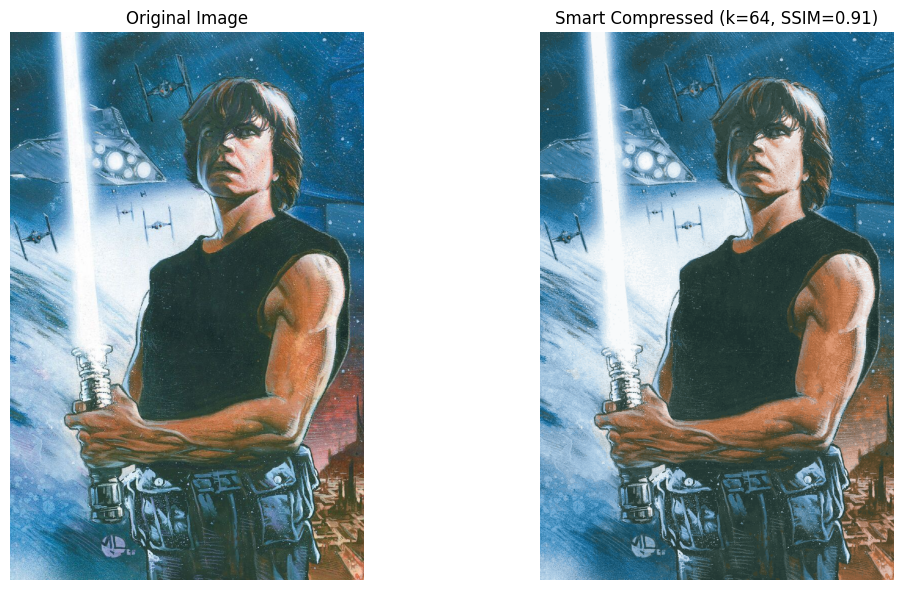

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Smart Compressed (k={optimal_k}, SSIM={final_ssim:.2f})")
plt.imshow(compressed_img)
plt.axis('off')

plt.tight_layout()
plt.show()

# Thank you for your Support 🤗